In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("datasets_42674_74935_Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Gender"] = le.fit_transform( df["Gender"] ) 
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [4]:
import matplotlib.pyplot as plt

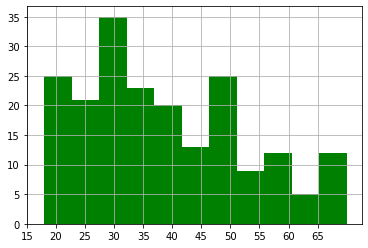

In [12]:
plt.hist(df["Age"] , bins = 11 , histtype='bar', color = 'g')
plt.xticks(range(15,70,5))
plt.grid()
plt.show()

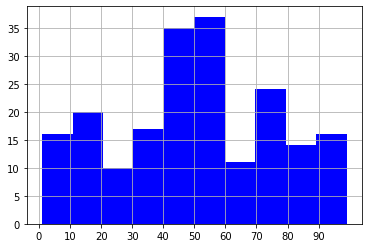

In [13]:
plt.hist(df["Spending Score (1-100)"] , bins = 10 , histtype='bar', color = 'b')
plt.xticks(range(0,100,10))
plt.grid()
plt.show()

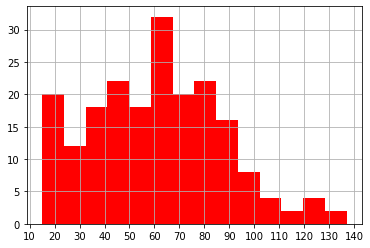

In [14]:
plt.hist(df["Annual Income (k$)"] , bins = 14 , histtype='bar', color = 'r')
plt.xticks(range(10,150,10))
plt.grid()
plt.show()

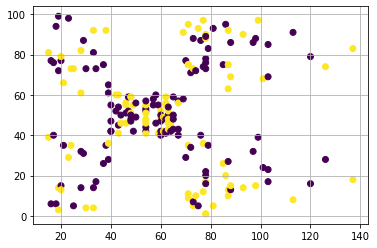

In [19]:
plt.scatter(df["Annual Income (k$)"] , 
            df["Spending Score (1-100)"] , 
            c=df['Gender'] , cmap = "viridis" )
plt.grid()
plt.show()

In [26]:
from sklearn.cluster import KMeans
X =  df.drop(["CustomerID"],axis=1)

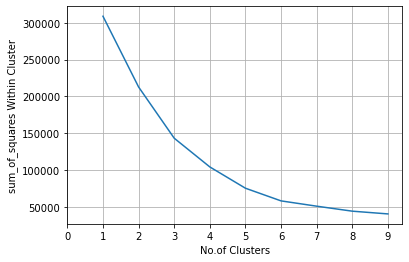

In [53]:
sum_of_squares = []
for i in range(1, 10):
    km = KMeans(n_clusters = i  , random_state = 50)
    km.fit(X)
    sum_of_squares.append(km.inertia_)
plt.plot(range(1, 10), sum_of_squares)
plt.xlabel('No.of Clusters')
plt.xticks(range(0,10,1))
plt.grid(which="both")
plt.ylabel('sum_of_squares Within Cluster')
plt.show()

In [54]:
km = KMeans(n_clusters = 5)
y_km = km.fit_predict(X)

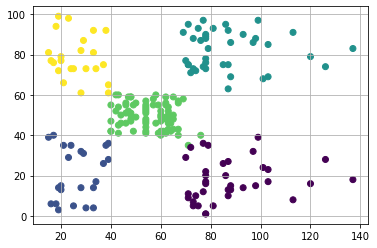

In [56]:
plt.scatter(df["Annual Income (k$)"] , 
            df["Spending Score (1-100)"] , 
            c=y_km , cmap = "viridis" )
plt.grid()
plt.show()